In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model 
Base = automap_base()
# # reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
inspector = inspect(engine)
# inspector.get_table_names()

In [8]:
### Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#list of data in table
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
### Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#list of data in table
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [12]:
# Save references to each table

M = Base.classes.measurement
S = Base.classes.station


In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(M.date).order_by(M.date.desc()).first()





('2017-08-23',)

In [15]:
####last date

session.query(M.date).order_by(M.date).first()


('2010-01-01',)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

session.query(M.date).\
    filter(M.date > '2016-08-23').\
    order_by(M.date.desc()).all()


[('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08

In [17]:
# Calculate the date one year from the last date in data set.
# # year_ago = dt.date.today() - dt.timedelta(days=7)
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)


2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores
#the two tables has no column data however it has date...
# Filter for players born before 1940, and for players born in or after 1940
precipitation = session.query(M.date, M.prcp).\
    filter(M.date > year_ago).\
    order_by(M.date).all()

#save as pd dataframe and sort by date
#precipitation_df = pd.DataFrame(query, precipitation)
precipitation_df = pd.DataFrame(precipitation, columns = ["date", "prcp"])
precipitation_df.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [19]:
#sort by date and set index by date

precipitation_df = precipitation_df.sort_values(by="date", ascending = True)
precipitation_df.set_index("date")

precipitation_df.head()






,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [20]:
precipitation_df.dropna(inplace=True)
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15


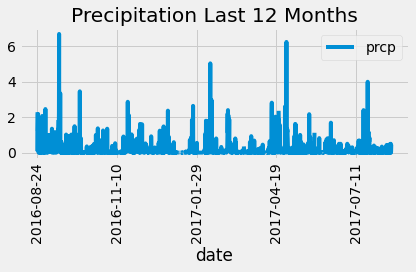

<Figure size 432x288 with 0 Axes>

In [21]:

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df = pd.DataFrame(precipitation, columns = ["date", "prcp"])
precipitation_df.set_index('date', inplace=True)
precipitation_df =precipitation_df.sort_index()
precipitation_df.plot(rot=90)
plt.title("Precipitation Last 12 Months")
plt.tight_layout()
plt.show()
plt.savefig("Precipitation_last_12Months.png")

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset

session.query(func.count(S.station)).all()


[(9,)]

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_active = session.query(M.station, func.count(M.station)).\
                  order_by(func.count(M.station).desc()).group_by(M.station).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, 
#calculate the lowest, highest, and average temperature.
#tobs represent temp colomn on tabale

Temp_calculation = stations_active[0][0]
Temp_calculations=session.query(func.min(M.tobs), func.avg(M.tobs), func.max(M.tobs)).\
                filter(M.station == Temp_calculation).all()

print(f"Lowest Temperature: {Temp_calculations[0][0]}")
print(f"Average Temperature: {Temp_calculations[0][1]}")
print(f"Highest Temperature: {Temp_calculations[0][2]}")


Lowest Temperature: 54.0
Average Temperature: 71.66378066378067
Highest Temperature: 85.0


In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
#and plot the results as a histogram

highest_temp = (
    session.query(M.date, M.tobs).filter(M.date > year_ago)
    .filter(M.station == stations_active[0][0])
    .order_by(M.date)
    .all()
)
highest_temp


[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [27]:
# Convert query object to dataframe to provide df for plotting
temp_df = pd.DataFrame(highest_temp)
temp_df.head()

,0,1
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


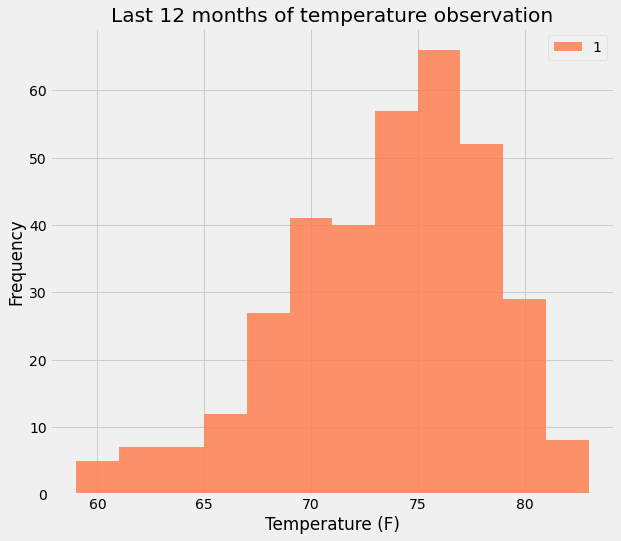

In [28]:
# finally using the df plot the Histogram 
temp_df.plot(kind="hist", color="coral", bins=12, alpha=0.85, figsize=(9, 8))
plt.title("Last 12 months of temperature observation")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.savefig('hist.png')


# Close session

In [29]:
# Close Session
session.close()